In [2]:
!pip install catboost

In [4]:
## Data handling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

## Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('/kaggle/input/test-grad/copy merged.csv')
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,Region RWMA,VHD,Cath,FileName,EF,ESV,EDV
0,53,90,175,Male,29.387755,0,1,1,0,0,Y,N,N,N,N,N,Y,110,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,1,1,N,N,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,0,N,Cad,0X102C51641C321436,50.836241,30.907196,62.865812
1,67,70,157,Fmale,28.398718,0,1,0,0,0,Y,N,N,N,N,N,N,140,80,1,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,4,N,Cad,0X11751D404DAD3313,40.763986,187.831612,317.090229
2,54,54,164,Male,20.077335,0,0,1,0,0,N,N,N,N,N,N,N,100,100,0,N,N,N,N,1,N,0,N,N,N,N,0,0,0,0,N,N,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,2,mild,Cad,0X11C89001BEF939E2,40.431085,74.086258,124.370670
3,66,67,158,Fmale,26.838648,0,1,0,0,0,Y,N,N,N,N,N,N,100,80,0,N,N,N,Y,0,Y,3,N,Y,N,N,0,0,1,0,N,N,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,0,Severe,Normal,0X10075961BC11C88E,54.545097,33.143084,72.914210
4,50,87,153,Fmale,37.165193,0,1,0,0,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,0,Y,2,N,N,N,N,0,0,0,0,N,N,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,0,Severe,Normal,0X102CFB07F752AAE6,50.794718,33.947173,68.990913


In [7]:
## Dat set size
print(f'The data set has {data.shape[0]} rows and {data.shape[1]} columns')

The data set has 303 rows and 58 columns


In [8]:
## Data set information
print("**"*30)
print(" "*15, "Information data set")
print("**"*30)
print(data.info())

************************************************************
                Information data set
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA

In [9]:
# We configure the name of the columns.
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current_Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway_disease',
       'Thyroid_Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak_Peripheral_Pulse', 'Lung_rales', 'Systolic_Murmur',
       'Diastolic_Murmur', 'Typical_Chest_Pain', 'Dyspnea', 'Function_Class',
       'Atypical', 'Nonanginal', 'Exertional_CP', 'LowTH_Ang', 'Q_Wave',
       'St_Elevation', 'St_Depression', 'Tinversion', 'LVH',
       'Poor_R_Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'Region_RWMA', 'VHD',
       'Cath', 'FileName', 'EF', 'ESV', 'EDV'],
      dtype='object')

In [10]:
# Checking missing values
data.isnull().sum().any()

False

In [11]:
## Checking duplicate rows
print(f'There are {data.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


In [24]:
## Now, we select the categorical and numeric variables to plot.

# Numerical variables:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC',
            'Lymph', 'Neut', 'PLT', 'EF','ESV','EDV']

# Categorical variables:
cat_cols = ['Sex', 'DM', 'HTN', 'Function_Class', 'Region_RWMA', 'Current_Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway_disease', 'Thyroid_Disease',
            'CHF', 'DLP', 'Edema', 'Weak_Peripheral_Pulse', 'Lung_rales', 'Systolic_Murmur', 'Diastolic_Murmur', 'Typical_Chest_Pain',
            'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional_CP', 'LowTH_Ang', 'Q_Wave', 'St_Elevation', 'St_Depression', 'Tinversion',
            'LVH', 'Poor_R_Progression', 'VHD', 'Cath']

In [25]:
# Now we visualize the values that each categorical variable takes.
print("=="*30)
print(f"Total Categorical Variables = {len(cat_cols)}")
print("=="*30)
for cat_col in cat_cols:
  print(f"* {cat_col} ==> {data[cat_col].unique()} ==> {data[cat_col].nunique()} unique values")

Total Categorical Variables = 34
* Sex ==> ['Male' 'Female'] ==> 2 unique values
* DM ==> [0 1] ==> 2 unique values
* HTN ==> [1 0] ==> 2 unique values
* Function_Class ==> [0 3 2 1] ==> 4 unique values
* Region_RWMA ==> [0 4 2 3 1] ==> 5 unique values
* Current_Smoker ==> [1 0] ==> 2 unique values
* EX-Smoker ==> [0 1] ==> 2 unique values
* FH ==> [0 1] ==> 2 unique values
* Obesity ==> ['Y' 'N'] ==> 2 unique values
* CRF ==> ['N' 'Y'] ==> 2 unique values
* CVA ==> ['N' 'Y'] ==> 2 unique values
* Airway_disease ==> ['N' 'Y'] ==> 2 unique values
* Thyroid_Disease ==> ['N' 'Y'] ==> 2 unique values
* CHF ==> ['N' 'Y'] ==> 2 unique values
* DLP ==> ['Y' 'N'] ==> 2 unique values
* Edema ==> [0 1] ==> 2 unique values
* Weak_Peripheral_Pulse ==> ['N' 'Y'] ==> 2 unique values
* Lung_rales ==> ['N' 'Y'] ==> 2 unique values
* Systolic_Murmur ==> ['N' 'Y'] ==> 2 unique values
* Diastolic_Murmur ==> ['N' 'Y'] ==> 2 unique values
* Typical_Chest_Pain ==> [0 1] ==> 2 unique values
* Dyspnea ==> ['N

In [26]:
# Now we visualize the numeric variables.
print("=="*30)
print(f"Total Numerical Variables = {len(num_cols)}")
print("=="*30)
for num_col in num_cols:
  print(f"* {num_col}")

Total Numerical Variables = 23
* Age
* Weight
* Length
* BMI
* BP
* PR
* FBS
* CR
* TG
* LDL
* HDL
* BUN
* ESR
* HB
* K
* Na
* WBC
* Lymph
* Neut
* PLT
* EF
* ESV
* EDV


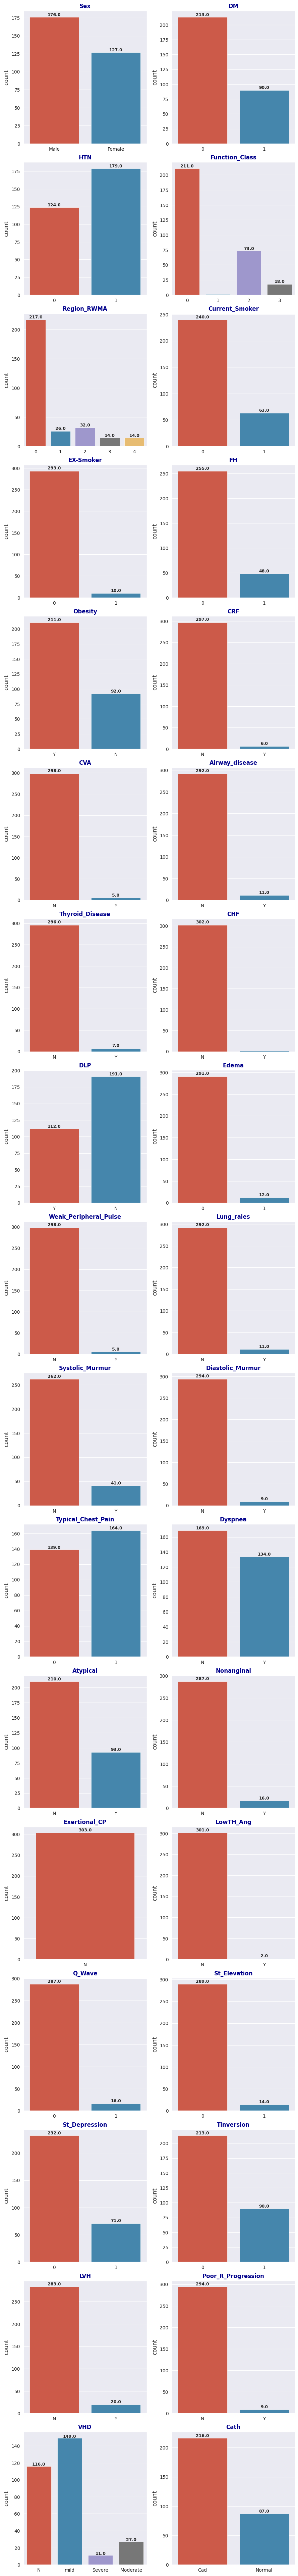

In [27]:
# Ensure that the number of rows is enough to fit all categories
num_plots = len(cat_cols)
rows = (num_plots // 2) + (num_plots % 2)  # Calculate the number of rows needed
fig, ax = plt.subplots(rows, 2, figsize=(9, 5 * rows))  # Adjust the height for better spacing
ax = ax.flat  # Flatten the axes for easy indexing

# Then your loop remains the same
for i, cat_col in enumerate(cat_cols):
    rects = sns.countplot(data, x=cat_col, ax=ax[i])

    # Add values over the bars
    for rect in rects.patches:
        height = rect.get_height()
        ax[i].annotate(f'{height}', (rect.get_x() + rect.get_width() / 2, height - 2),
                       xytext=(0, 3),  # Vertical distance of text from the bar
                       textcoords="offset points",
                       size=9,
                       ha='center',
                       va='bottom',
                       weight='bold')

    ax[i].set_title(f'{cat_col}', fontsize=12, fontweight='bold', color='darkblue')
    ax[i].set_xlabel('')

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.show()


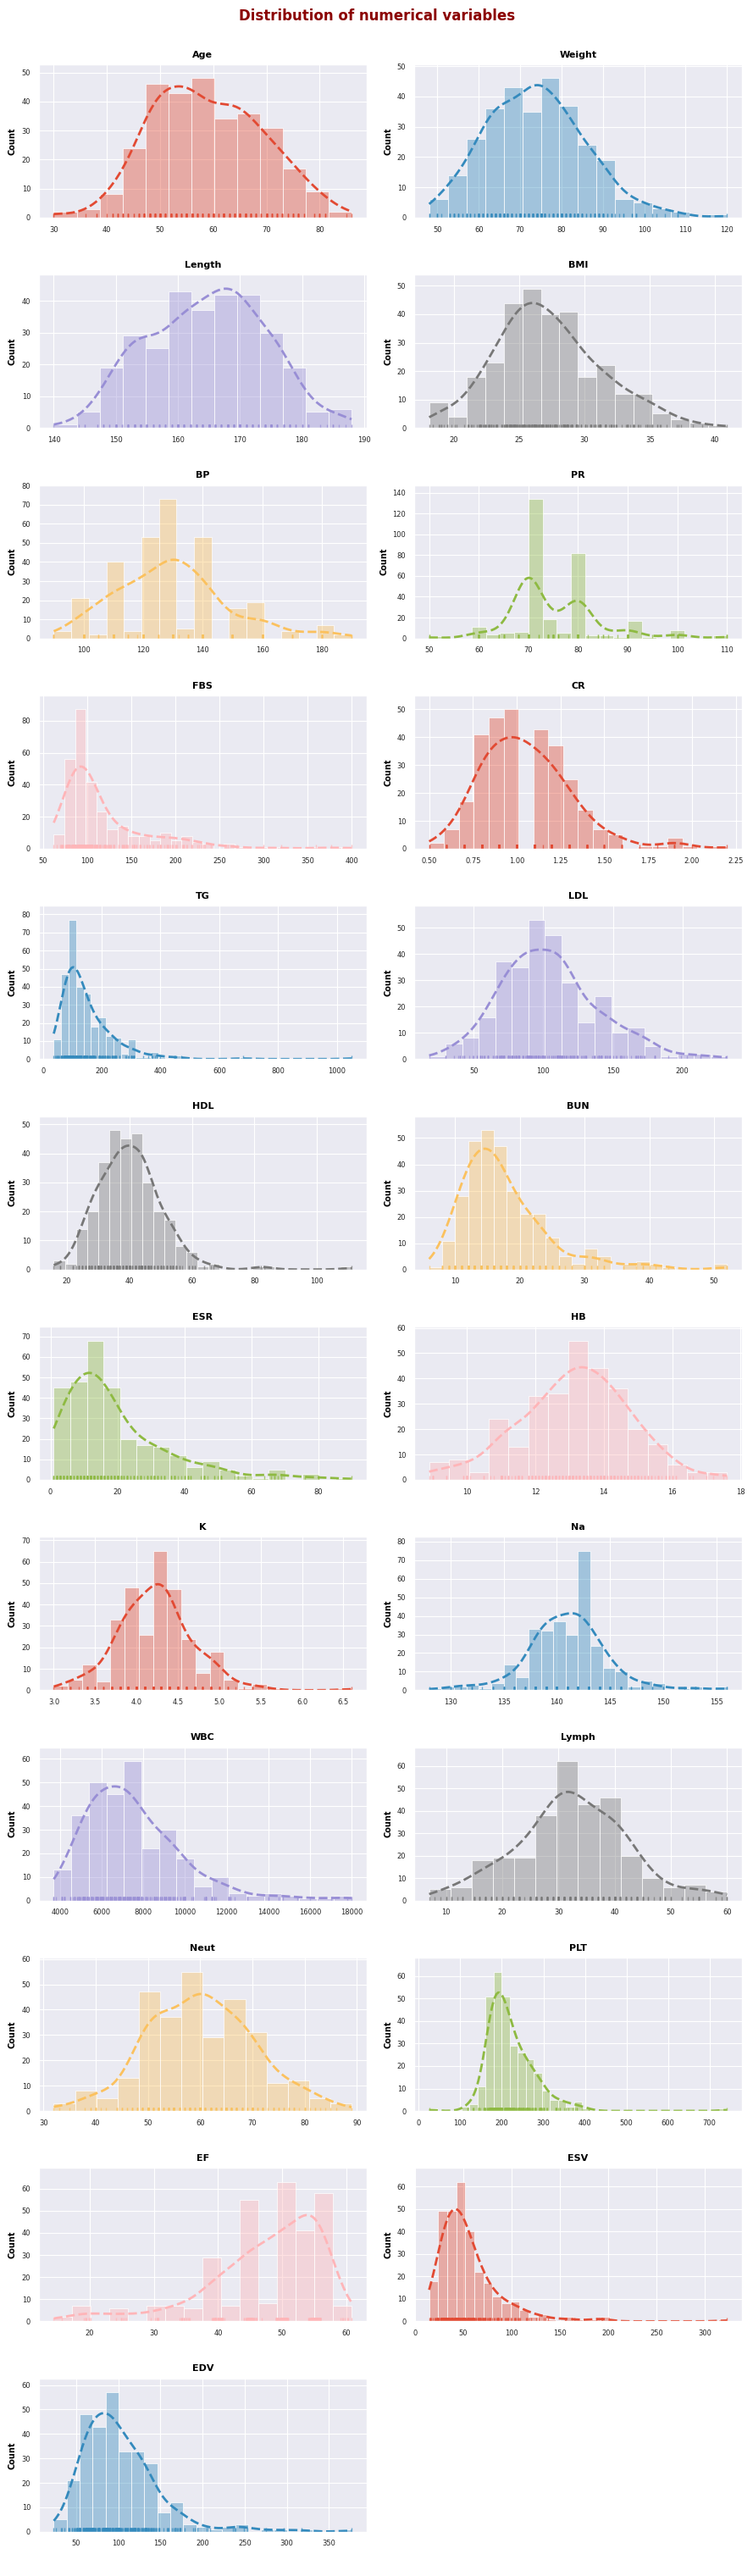

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the number of rows and columns based on the length of num_cols
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC',
            'Lymph', 'Neut', 'PLT', 'EF','ESV','EDV']
fig, axes = plt.subplots(nrows=(len(num_cols) // 2) + 1, ncols=2, figsize=(9, (len(num_cols) // 2) * 3))

axes = axes.flat
color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

for i, num_col in enumerate(num_cols):
    sns.histplot(data,
                 x=num_col,
                 stat='count',
                 kde=True,
                 color=color_cycle[i % num_colors]["color"],
                 line_kws={'linewidth': 2, 'linestyle': 'dashed'},
                 alpha=0.4,
                 ax=axes[i])
    sns.rugplot(data,
                x=num_col,
                color=color_cycle[i % num_colors]["color"],
                ax=axes[i], alpha=0.7)

    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize=7, fontweight='bold', color='black')
    axes[i].set_title(num_col, fontsize=8, fontweight='bold', color='black')
    axes[i].tick_params(labelsize=6)

# Delete the last axis if there are extra subplots
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[len(num_cols)])

fig.suptitle('Distribution of numerical variables', fontsize=12, fontweight='bold', color='darkred', y=0.92)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.show()

  

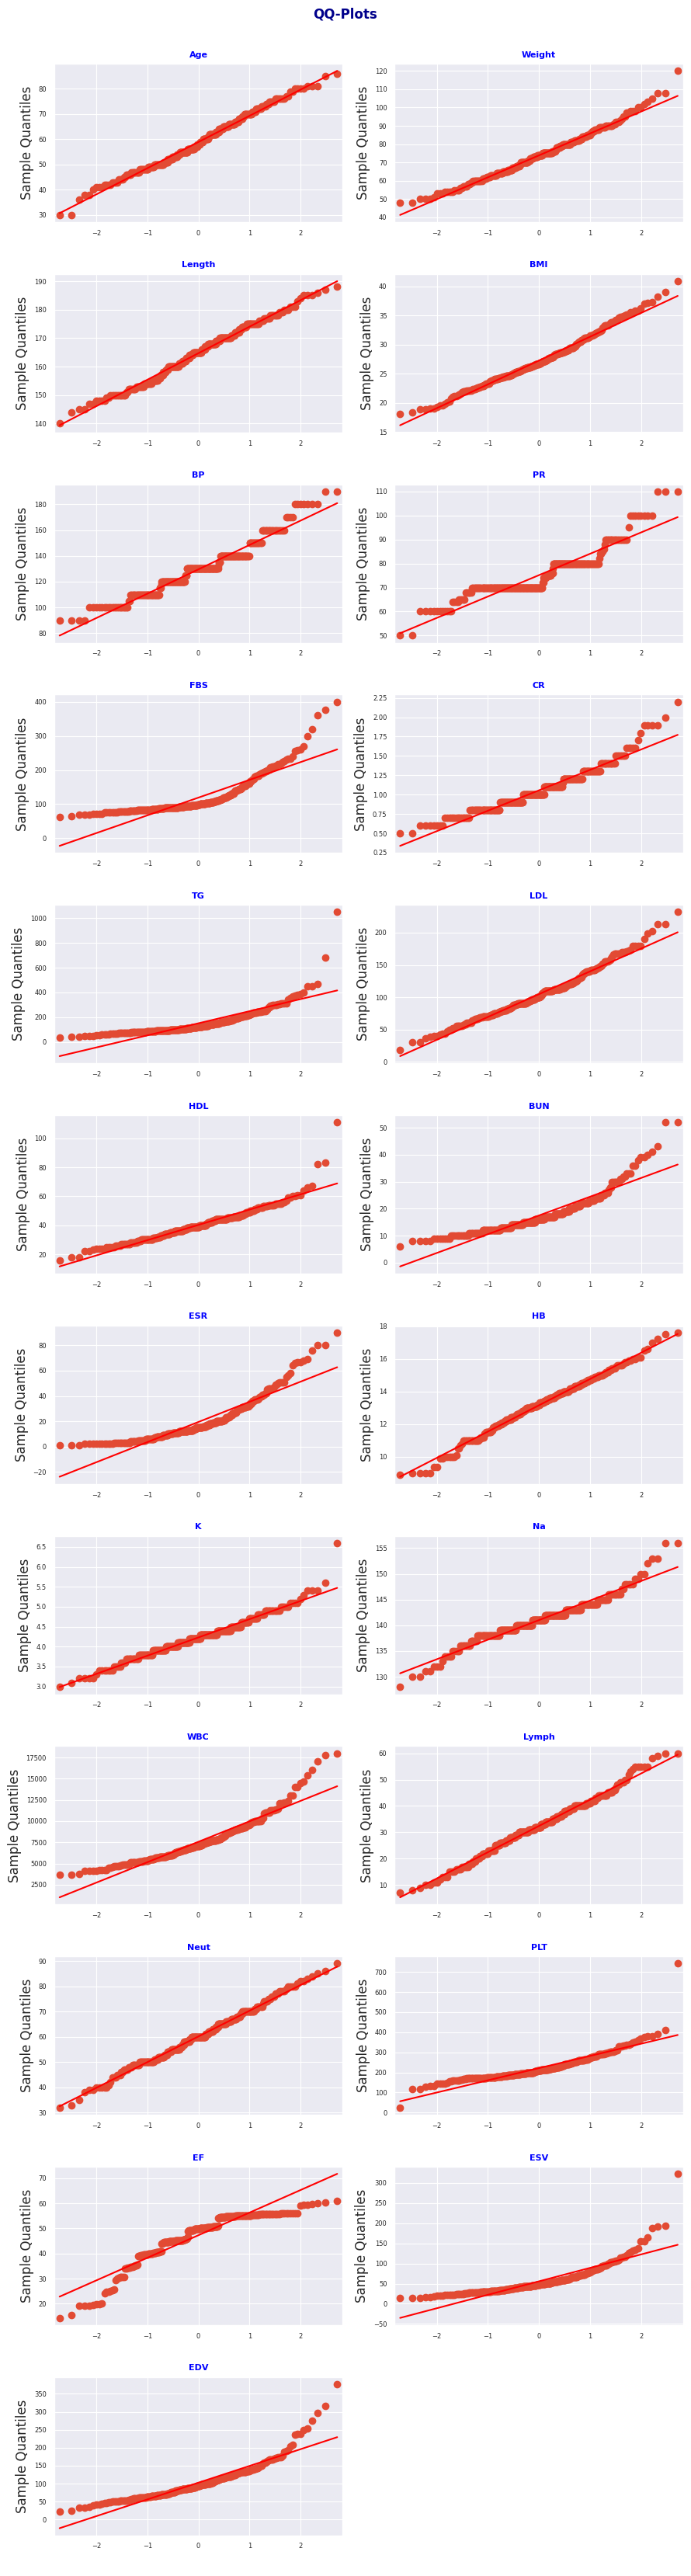

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Ensure num_cols has a valid number of columns
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC',
            'Lymph', 'Neut', 'PLT', 'EF','ESV','EDV']
num_plots = len(num_cols)

# Calculate the number of rows based on the number of plots (num_cols)
rows = (num_plots // 2) + (num_plots % 2)  # Round up if odd number of columns

# Create subplots
fig, axes = plt.subplots(rows, 2, figsize=(9, rows * 3))
axes = axes.flat  # Flatten axes for easy indexing

for i, num_col in enumerate(num_cols):
    qqplot(data[num_col], line='s', ax=axes[i])

    axes[i].set_xlabel(" ")
    axes[i].set_title(num_col, fontsize=8, fontweight='bold', color='blue')
    axes[i].tick_params(labelsize=6)

# If there are extra subplots, delete the last ones
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('QQ-Plots', fontsize=12, fontweight='bold', color='darkblue', y=0.92)
fig.show()


In [30]:
for i, num_col in enumerate(num_cols):
  p_value = shapiro(data[num_col])[1]
  value = 'No Normal Distribution' if p_value < 0.05 else 'Normal Distribution'
  print(f'* {num_col}: p-value = {p_value}  ==>  {value}\n')

* Age: p-value = 0.031623623133325285  ==>  No Normal Distribution

* Weight: p-value = 0.007982313968469058  ==>  No Normal Distribution

* Length: p-value = 0.02447197595523171  ==>  No Normal Distribution

* BMI: p-value = 0.004061411243221725  ==>  No Normal Distribution

* BP: p-value = 4.038616158549375e-08  ==>  No Normal Distribution

* PR: p-value = 6.633461351410326e-16  ==>  No Normal Distribution

* FBS: p-value = 2.838568000266933e-21  ==>  No Normal Distribution

* CR: p-value = 1.859580075451761e-09  ==>  No Normal Distribution

* TG: p-value = 1.5654540889063006e-22  ==>  No Normal Distribution

* LDL: p-value = 0.00017859460693063535  ==>  No Normal Distribution

* HDL: p-value = 1.8084919111260403e-11  ==>  No Normal Distribution

* BUN: p-value = 3.8888726179779206e-16  ==>  No Normal Distribution

* ESR: p-value = 1.7804074051368906e-16  ==>  No Normal Distribution

* HB: p-value = 0.13010798300018683  ==>  Normal Distribution

* K: p-value = 1.9554089350491913e-05 

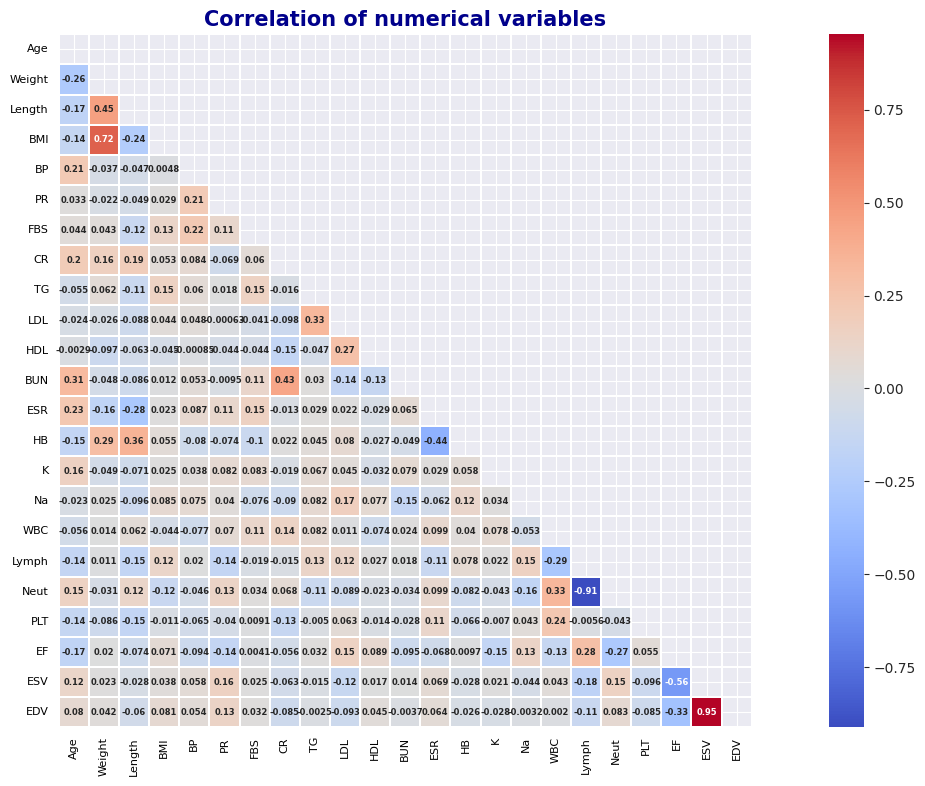

In [31]:
## Correlation plot, we use Spearman's correlation since most of the numerical variables do not come from a normal distribution,
# according to the Shapiro test that we performed.

corr_matrix = data[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig,ax = plt.subplots(figsize=(20,9))
sns.heatmap(corr_matrix,
            mask = mask,
            square = True,
            annot = True,
            ax = ax,
            linewidths = 0.2,
            annot_kws = {'size':6, 'fontweight':'bold'},
            cmap='coolwarm')
ax.tick_params(labelsize=8, color = 'blue', labelcolor='black')
ax.set_title('Correlation of numerical variables',fontsize = 15,fontweight='bold', color = 'darkblue')
fig.show()

In [32]:
# Change the value of 'Fmale' to 'Female'
data[cat_cols[0]] = data[cat_cols[0]].str.replace('Fmale','Female')

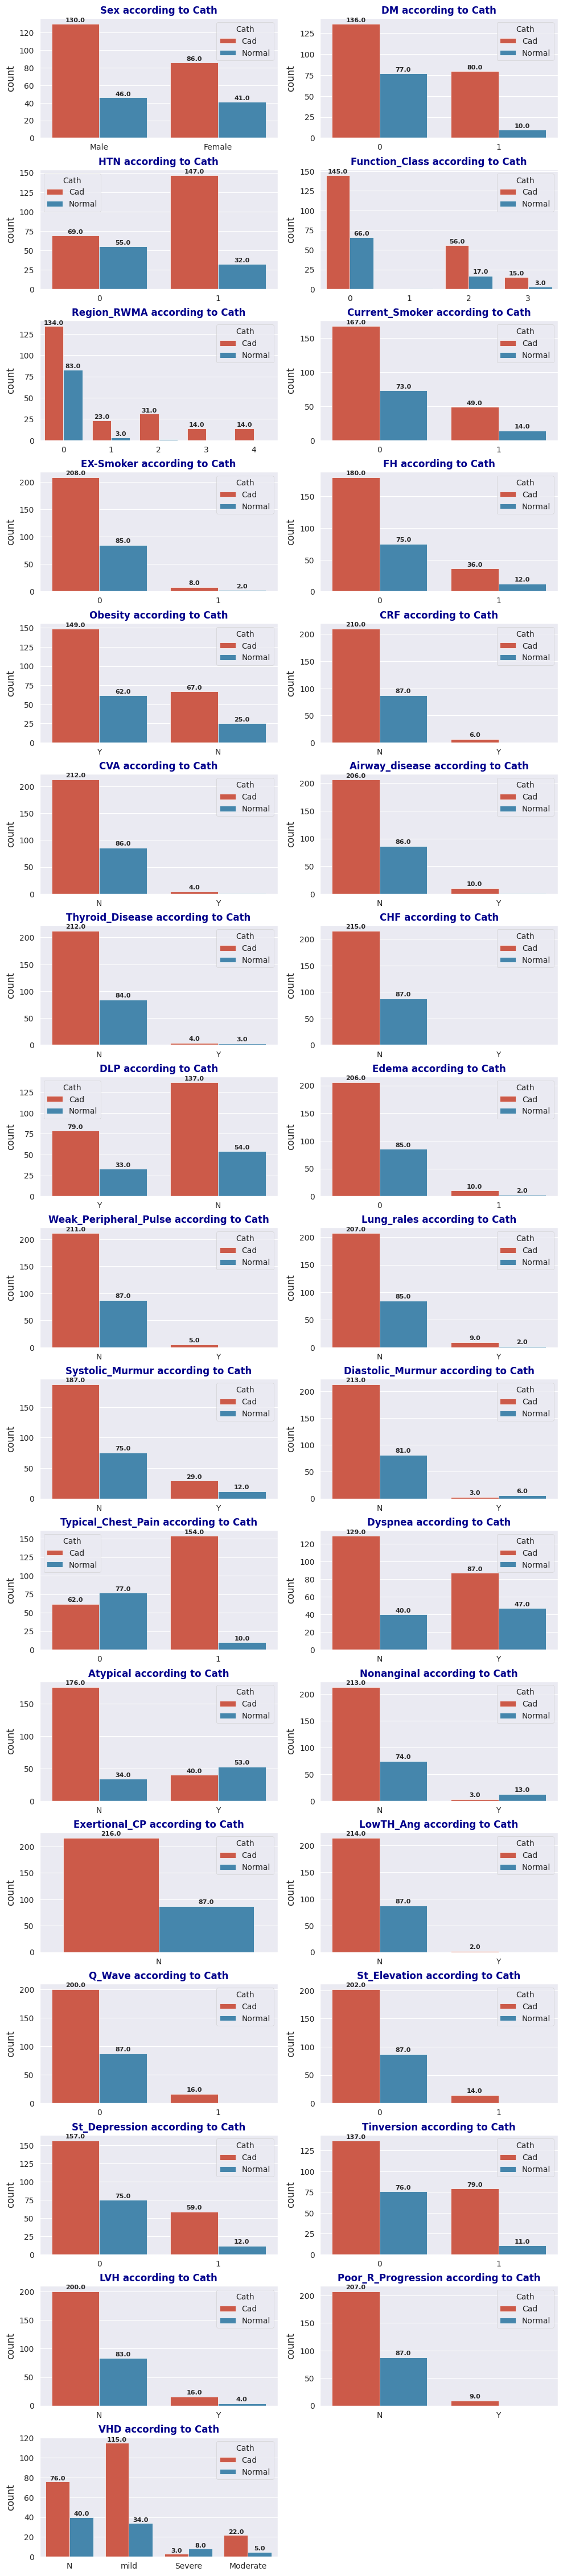

In [33]:
fig,ax = plt.subplots(17,2,figsize = (10,50))
ax = ax.flat

for i,j in enumerate(cat_cols[:-1]):
  rects = sns.countplot(data, x = j, hue = cat_cols[-1], ax = ax[i])


  for rect in rects.patches:
      height = rect.get_height()
      ax[i].annotate(f'{height}', (rect.get_x() + rect.get_width() / 2, height-2),
                  xytext=(0, 3),  
                  textcoords="offset points",
                  size = 8,
                  ha='center',
                  va='bottom',
                  weight = 'bold')

  ax[i].set_title(f'{j} according to {cat_cols[-1]}', fontsize = 12, fontweight = 'bold', color = 'darkblue')
  ax[i].set_xlabel('')

fig.delaxes(ax[33])
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

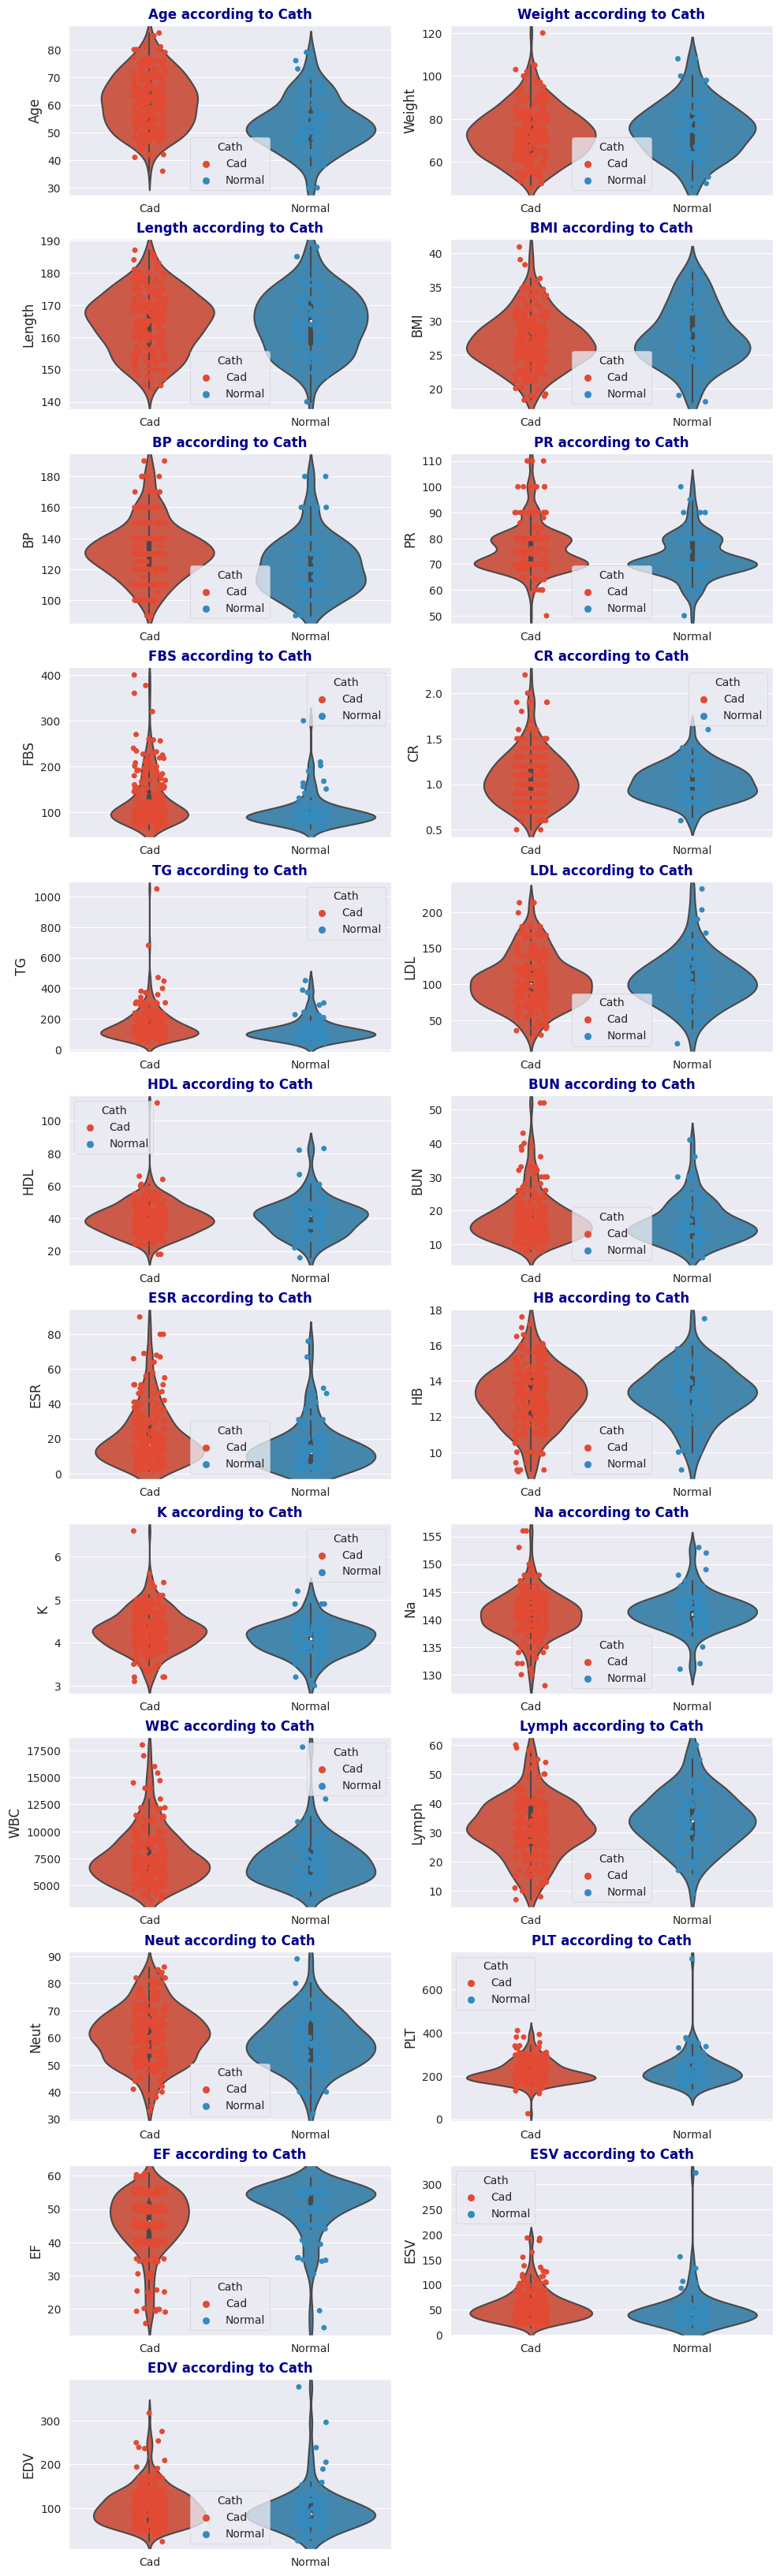

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure num_cols and cat_cols are defined
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC',
            'Lymph', 'Neut', 'PLT', 'EF','ESV','EDV']

# Categorical variables:
cat_cols = ['Sex', 'DM', 'HTN', 'Function_Class', 'Region_RWMA', 'Current_Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway_disease', 'Thyroid_Disease',
            'CHF', 'DLP', 'Edema', 'Weak_Peripheral_Pulse', 'Lung_rales', 'Systolic_Murmur', 'Diastolic_Murmur', 'Typical_Chest_Pain',
            'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional_CP', 'LowTH_Ang', 'Q_Wave', 'St_Elevation', 'St_Depression', 'Tinversion',
            'LVH', 'Poor_R_Progression', 'VHD', 'Cath']

num_plots = len(num_cols)
rows = (num_plots // 2) + (num_plots % 2)  # Round up if odd number of columns

# Create subplots based on the number of plots required
fig, ax = plt.subplots(rows, 2, figsize=(10, rows * 3))
ax = ax.flat  # Flatten axes for easy indexing

sns.set_style('darkgrid')

for i, num_col in enumerate(num_cols):
    sns.violinplot(data=data, x=cat_cols[-1], y=num_col, ax=ax[i])
    sns.stripplot(data=data, x=cat_cols[-1], y=num_col, hue=cat_cols[-1], ax=ax[i])

    ax[i].set_title(f'{num_col} according to {cat_cols[-1]}', fontsize=12, fontweight='bold', color='darkblue')
    ax[i].set_xlabel('')

# Delete extra axes if there are more subplots than required
for i in range(num_plots, len(ax)):
    fig.delaxes(ax[i])

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.show()


In [35]:
# We select the independent variables.
X = data.drop('Cath', axis = 1)
# We select the target variable.
y = data['Cath']

In [36]:
# Maper
map_label = {'Cad':1,
             'Normal':0}
# We map the target variable
y = y.map(map_label)

In [37]:
# We remove the objective variable from the list of categorical variables
cat_cols.remove('Cath')
cat_cols

['Sex',
 'DM',
 'HTN',
 'Function_Class',
 'Region_RWMA',
 'Current_Smoker',
 'EX-Smoker',
 'FH',
 'Obesity',
 'CRF',
 'CVA',
 'Airway_disease',
 'Thyroid_Disease',
 'CHF',
 'DLP',
 'Edema',
 'Weak_Peripheral_Pulse',
 'Lung_rales',
 'Systolic_Murmur',
 'Diastolic_Murmur',
 'Typical_Chest_Pain',
 'Dyspnea',
 'Atypical',
 'Nonanginal',
 'Exertional_CP',
 'LowTH_Ang',
 'Q_Wave',
 'St_Elevation',
 'St_Depression',
 'Tinversion',
 'LVH',
 'Poor_R_Progression',
 'VHD']

In [38]:
## We will define a preprocessor to transform our variables in general:
# - OneHotEncoder: Categorical variables
# - MinMaxScaler: Numerical variables

preprocessor = ColumnTransformer(transformers = [('ohe',
                                                  OneHotEncoder(handle_unknown = 'ignore',
                                                                       sparse_output = False),
                                                  cat_cols),
                                                 ('scaler',
                                                  StandardScaler(),
                                                  num_cols)],
                                 remainder = 'passthrough',
                                 verbose_feature_names_out = False).set_output(transform = 'pandas')

# We fit and transform the data set
X_prep = preprocessor.fit_transform(X)

In [39]:
# We visualized how our data set was transformed.
X_prep.head()

,Sex_Female,Sex_Male,DM_0,DM_1,HTN_0,HTN_1,Function_Class_0,Function_Class_1,Function_Class_2,Function_Class_3,Region_RWMA_0,Region_RWMA_1,Region_RWMA_2,Region_RWMA_3,Region_RWMA_4,Current_Smoker_0,Current_Smoker_1,EX-Smoker_0,EX-Smoker_1,FH_0,FH_1,Obesity_N,Obesity_Y,CRF_N,CRF_Y,CVA_N,CVA_Y,Airway_disease_N,Airway_disease_Y,Thyroid_Disease_N,Thyroid_Disease_Y,CHF_N,CHF_Y,DLP_N,DLP_Y,Edema_0,Edema_1,Weak_Peripheral_Pulse_N,Weak_Peripheral_Pulse_Y,Lung_rales_N,Lung_rales_Y,Systolic_Murmur_N,Systolic_Murmur_Y,Diastolic_Murmur_N,Diastolic_Murmur_Y,Typical_Chest_Pain_0,Typical_Chest_Pain_1,Dyspnea_N,Dyspnea_Y,Atypical_N,Atypical_Y,Nonanginal_N,Nonanginal_Y,Exertional_CP_N,LowTH_Ang_N,LowTH_Ang_Y,Q_Wave_0,Q_Wave_1,St_Elevation_0,St_Elevation_1,St_Depression_0,St_Depression_1,Tinversion_0,Tinversion_1,LVH_N,LVH_Y,Poor_R_Progression_N,Poor_R_Progression_Y,VHD_Moderate,VHD_N,VHD_Severe,VHD_mild,Age,Weight,Length,BMI,BP,PR,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF,ESV,EDV,FileName
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.568446,1.351012,1.104333,0.522817,-1.034254,0.546031,-0.561315,-1.347725,1.019010,1.424985,-0.970816,-1.368075,-0.783276,1.521673,1.025931,0.000868,-0.772712,0.662975,-0.801571,0.650977,0.395341,-0.743931,-0.855873,0X102C51641C321436
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.780937,-0.320172,-0.828604,0.281122,0.552475,0.546031,-0.753646,-0.210758,1.622296,0.462854,-0.401645,1.799548,0.410930,0.464323,1.025931,3.946579,0.057248,0.562534,-0.506461,-0.930681,-0.724526,3.953160,4.602118,0X11751D404DAD3313
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.472061,-1.657120,-0.076906,-1.752404,-1.563163,2.793959,-0.657481,-0.210758,-0.484094,-0.980342,0.452113,-0.072229,-0.594717,0.215534,1.025931,-0.525227,-0.067246,0.562534,-0.014609,0.140233,-0.761539,0.548513,0.464586,0X11C89001BEF939E2
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.684552,-0.570850,-0.721218,-0.100118,-1.563163,0.546031,-0.792113,0.547220,-0.893101,-1.404812,-1.255402,1.799548,3.553576,-0.655225,0.370114,0.263916,2.256644,-1.446280,1.165833,8.575744,0.807704,-0.677006,-0.640142,0X10075961BC11C88E
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.857599,1.100334,-1.258145,2.423417,-1.034254,0.546031,-0.292051,-0.210758,0.200994,0.151576,0.926422,-0.216212,0.473783,0.028943,-0.504308,-0.262179,0.679719,2.270027,-2.080384,0.865160,0.390725,-0.652938,-0.724372,0X102CFB07F752AAE6


In [40]:
# Size of the data set after preprocessing.
print(f'Data size: {X_prep.shape[0]} rows and {X_prep.shape[1]} columns')

Data size: 303 rows and 96 columns


In [41]:
##***************************************** Plot Metrics *****************************************
def plot_metrics(metrics_train:dict, metrics_test:dict, metrics:list)->None:
    """
    Function to plot the selected metrics.
    Note: Choose 4 metrics.

    Args:

      - metrics_train(dict): metrics of the training set.
      - metrics_test(dict): metrics of the testing set.
      - metrics(list): metrics list.
    """

    df_metrics = pd.DataFrame(index = metrics,
                              data = {'Train':[metrics_train[metric] for metric in metrics],
                                      'Test':[metrics_test[metric] for metric in metrics]})


    n = len(df_metrics.index)
    x = np.arange(n)


    width = 0.25

    fig,ax = plt.subplots(figsize=(6,4))

    rects1 = ax.bar(x-width, df_metrics.Train, width=width, label='Train',linewidth=1.6,edgecolor='black',color='blue')

    rects2 = ax.bar(x, df_metrics.Test, width=width, label='Test',linewidth=1.6, edgecolor='black', color = 'red')

    ax.set_title('Metrics',fontsize=12, fontweight='bold')
    ax.set_ylabel('Score',fontsize=10, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(x-0.13)
    ax.set_xticklabels(df_metrics.index, fontsize=10, fontweight='bold')
    ax.legend()

    def autolabel(rects):

      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', size = 7, weight = 'bold')

    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    fig.show()

In [42]:
## Because we have a smaller number of samples, we will use CROSS VALIDATION.

# We define our StratifiedKFold because we want to preserve the percentage of classes.
skf = StratifiedKFold(n_splits = 5, # 5 Folds
                      shuffle = True,
                      random_state = 123)

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Check for non-numeric columns in X_prep
non_numeric_cols = X_prep.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Example: Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()

for col in non_numeric_cols:
    X_prep[col] = label_encoder.fit_transform(X_prep[col])

# Now you can run cross-validation again
lr = LogisticRegression(random_state=123)

cv_results_lr = cross_validate(estimator=lr,
                               X=X_prep,
                               y=y,
                               scoring=['accuracy', 'precision', 'recall', 'f1'],
                               cv=skf,
                               verbose=1,
                               return_train_score=True,
                               error_score='raise')


Non-numeric columns: Index([], dtype='object')


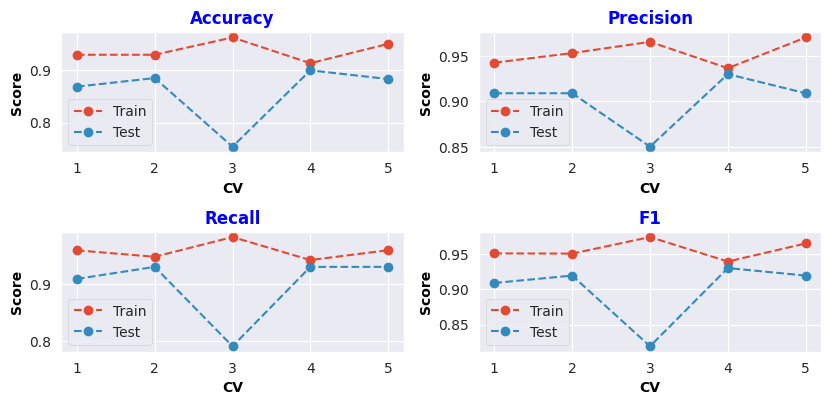

In [45]:
fig,axes = plt.subplots(2,2, figsize = (8.5, 4.2))
axes = axes.flat

axes[0].plot(np.arange(1,6,1),cv_results_lr['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
axes[0].plot(np.arange(1,6,1),cv_results_lr['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
axes[0].set_xticks(np.arange(1,6,1))
axes[0].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[0].legend()

axes[1].plot(np.arange(1,6,1),cv_results_lr['train_precision'], '-o', linestyle = 'dashed', label = 'Train')
axes[1].plot(np.arange(1,6,1),cv_results_lr['test_precision'], '-o', linestyle = 'dashed', label = 'Test')
axes[1].set_xticks(np.arange(1,6,1))
axes[1].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_title('Precision', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[1].legend()

axes[2].plot(np.arange(1,6,1),cv_results_lr['train_recall'], '-o', linestyle = 'dashed', label = 'Train')
axes[2].plot(np.arange(1,6,1),cv_results_lr['test_recall'], '-o', linestyle = 'dashed', label = 'Test')
axes[2].set_xticks(np.arange(1,6,1))
axes[2].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_title('Recall', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[2].legend()

axes[3].plot(np.arange(1,6,1),cv_results_lr['train_f1'], '-o', linestyle = 'dashed', label = 'Train')
axes[3].plot(np.arange(1,6,1),cv_results_lr['test_f1'], '-o', linestyle = 'dashed', label = 'Test')
axes[3].set_xticks(np.arange(1,6,1))
axes[3].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_title('F1', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[3].legend()

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

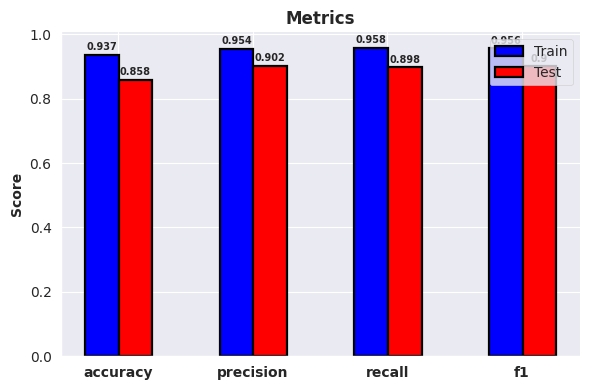

In [46]:
metrics_train_lr = {'accuracy':round(cv_results_lr['train_accuracy'].mean(), 3),
                'precision':round(cv_results_lr['train_precision'].mean(), 3),
                'recall':round(cv_results_lr['train_recall'].mean(), 3),
                'f1':round(cv_results_lr['train_f1'].mean(), 3)}

metrics_test_lr = {'accuracy':round(cv_results_lr['test_accuracy'].mean(), 3),
                'precision':round(cv_results_lr['test_precision'].mean(), 3),
                'recall':round(cv_results_lr['test_recall'].mean(), 3),
                'f1':round(cv_results_lr['test_f1'].mean(), 3)}

plot_metrics(metrics_train_lr, metrics_test_lr, ['accuracy', 'precision', 
                                                 'recall', 'f1'])

In [47]:
rf = RandomForestClassifier(random_state = 123)

cv_results_rf = cross_validate(estimator = rf,
                               X = X_prep,
                               y = y,
                               scoring = ['accuracy', 'precision', 'recall', 'f1'],
                               cv = skf,
                               verbose = 1,
                               return_train_score = True,
                               error_score = 'raise')

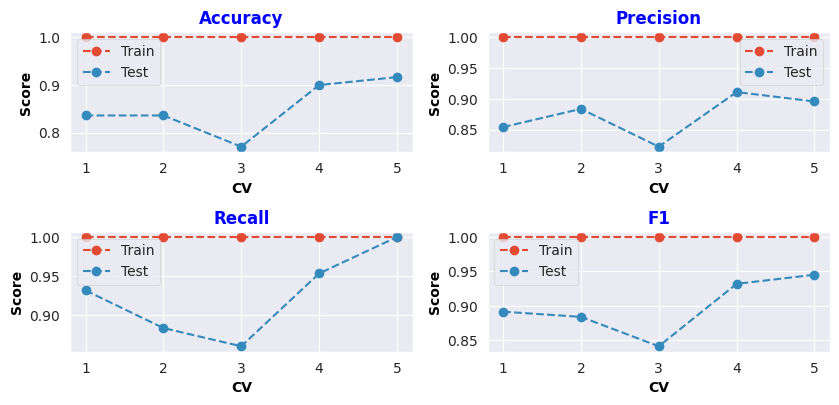

In [48]:
fig,axes = plt.subplots(2,2, figsize = (8.5, 4.2))
axes = axes.flat

axes[0].plot(np.arange(1,6,1),cv_results_rf['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
axes[0].plot(np.arange(1,6,1),cv_results_rf['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
axes[0].set_xticks(np.arange(1,6,1))
axes[0].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[0].legend()

axes[1].plot(np.arange(1,6,1),cv_results_rf['train_precision'], '-o', linestyle = 'dashed', label = 'Train')
axes[1].plot(np.arange(1,6,1),cv_results_rf['test_precision'], '-o', linestyle = 'dashed', label = 'Test')
axes[1].set_xticks(np.arange(1,6,1))
axes[1].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_title('Precision', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[1].legend()

axes[2].plot(np.arange(1,6,1),cv_results_rf['train_recall'], '-o', linestyle = 'dashed', label = 'Train')
axes[2].plot(np.arange(1,6,1),cv_results_rf['test_recall'], '-o', linestyle = 'dashed', label = 'Test')
axes[2].set_xticks(np.arange(1,6,1))
axes[2].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_title('Recall', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[2].legend()

axes[3].plot(np.arange(1,6,1),cv_results_rf['train_f1'], '-o', linestyle = 'dashed', label = 'Train')
axes[3].plot(np.arange(1,6,1),cv_results_rf['test_f1'], '-o', linestyle = 'dashed', label = 'Test')
axes[3].set_xticks(np.arange(1,6,1))
axes[3].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_title('F1', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[3].legend()

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

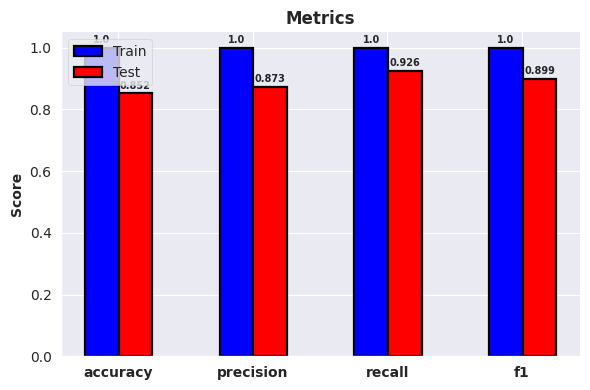

In [49]:
metrics_train_rf = {'accuracy':round(cv_results_rf['train_accuracy'].mean(), 3),
                'precision':round(cv_results_rf['train_precision'].mean(), 3),
                'recall':round(cv_results_rf['train_recall'].mean(), 3),
                'f1':round(cv_results_rf['train_f1'].mean(), 3)}

metrics_test_rf = {'accuracy':round(cv_results_rf['test_accuracy'].mean(), 3),
                'precision':round(cv_results_rf['test_precision'].mean(), 3),
                'recall':round(cv_results_rf['test_recall'].mean(), 3),
                'f1':round(cv_results_rf['test_f1'].mean(), 3)}

plot_metrics(metrics_train_rf, metrics_test_rf, ['accuracy', 'precision', 'recall', 'f1'])

In [50]:
lgbm = LGBMClassifier(random_state = 123, verbose = -1)

cv_results_lgbm = cross_validate(estimator = lgbm,
                                 X = X_prep,
                                 y = y,
                                 scoring = ['accuracy', 'precision', 'recall', 'f1'],
                                 cv = skf,
                                 verbose = 1,
                                 return_train_score = True,
                                 error_score = 'raise')

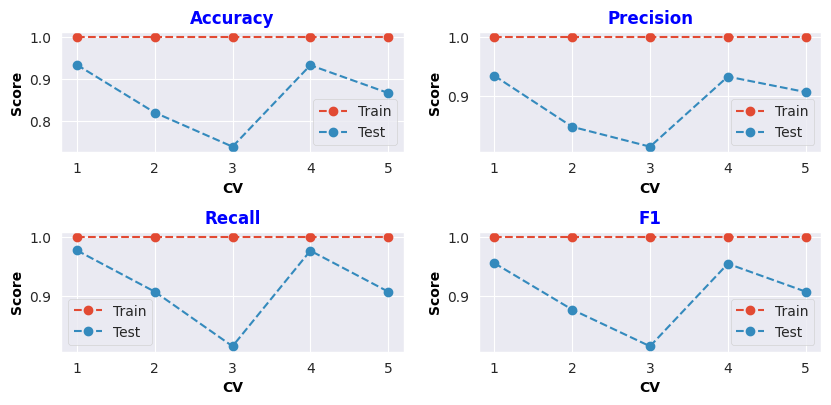

In [51]:
fig,axes = plt.subplots(2,2, figsize = (8.5, 4.2))
axes = axes.flat

axes[0].plot(np.arange(1,6,1),cv_results_lgbm['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
axes[0].plot(np.arange(1,6,1),cv_results_lgbm['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
axes[0].set_xticks(np.arange(1,6,1))
axes[0].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[0].legend()

axes[1].plot(np.arange(1,6,1),cv_results_lgbm['train_precision'], '-o', linestyle = 'dashed', label = 'Train')
axes[1].plot(np.arange(1,6,1),cv_results_lgbm['test_precision'], '-o', linestyle = 'dashed', label = 'Test')
axes[1].set_xticks(np.arange(1,6,1))
axes[1].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_title('Precision', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[1].legend()

axes[2].plot(np.arange(1,6,1),cv_results_lgbm['train_recall'], '-o', linestyle = 'dashed', label = 'Train')
axes[2].plot(np.arange(1,6,1),cv_results_lgbm['test_recall'], '-o', linestyle = 'dashed', label = 'Test')
axes[2].set_xticks(np.arange(1,6,1))
axes[2].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_title('Recall', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[2].legend()

axes[3].plot(np.arange(1,6,1),cv_results_lgbm['train_f1'], '-o', linestyle = 'dashed', label = 'Train')
axes[3].plot(np.arange(1,6,1),cv_results_lgbm['test_f1'], '-o', linestyle = 'dashed', label = 'Test')
axes[3].set_xticks(np.arange(1,6,1))
axes[3].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_title('F1', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[3].legend()

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

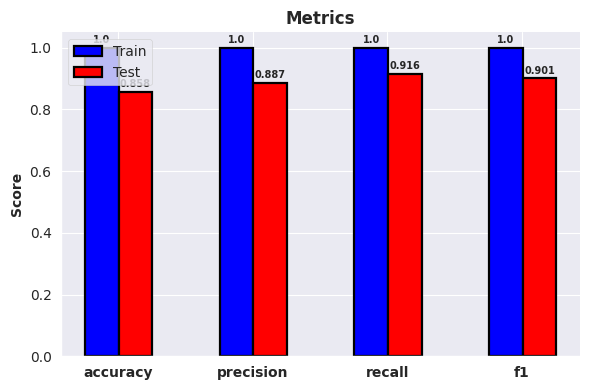

In [52]:
metrics_train_lgbm = {'accuracy':round(cv_results_lgbm['train_accuracy'].mean(), 3),
                'precision':round(cv_results_lgbm['train_precision'].mean(), 3),
                'recall':round(cv_results_lgbm['train_recall'].mean(), 3),
                'f1':round(cv_results_lgbm['train_f1'].mean(), 3)}

metrics_test_lgbm = {'accuracy':round(cv_results_lgbm['test_accuracy'].mean(), 3),
                'precision':round(cv_results_lgbm['test_precision'].mean(), 3),
                'recall':round(cv_results_lgbm['test_recall'].mean(), 3),
                'f1':round(cv_results_lgbm['test_f1'].mean(), 3)}

plot_metrics(metrics_train_lgbm, metrics_test_lgbm, ['accuracy', 'precision', 
                                                     'recall', 'f1'])

In [53]:
xgb = XGBClassifier(random_state = 123)

cv_results_xgb = cross_validate(estimator = xgb,
                                X = X_prep,
                                y = y,
                                scoring = ['accuracy', 'precision', 'recall', 'f1'],
                                cv = skf,
                                verbose = 1,
                                return_train_score = True,
                                error_score = 'raise')

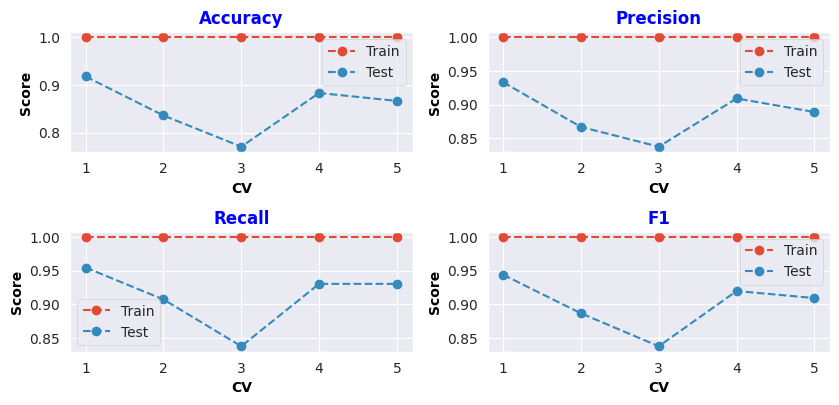

In [54]:
fig,axes = plt.subplots(2,2, figsize = (8.5,4.2))
axes = axes.flat

axes[0].plot(np.arange(1,6,1),cv_results_xgb['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
axes[0].plot(np.arange(1,6,1),cv_results_xgb['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
axes[0].set_xticks(np.arange(1,6,1))
axes[0].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[0].legend()

axes[1].plot(np.arange(1,6,1),cv_results_xgb['train_precision'], '-o', linestyle = 'dashed', label = 'Train')
axes[1].plot(np.arange(1,6,1),cv_results_xgb['test_precision'], '-o', linestyle = 'dashed', label = 'Test')
axes[1].set_xticks(np.arange(1,6,1))
axes[1].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_title('Precision', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[1].legend()

axes[2].plot(np.arange(1,6,1),cv_results_xgb['train_recall'], '-o', linestyle = 'dashed', label = 'Train')
axes[2].plot(np.arange(1,6,1),cv_results_xgb['test_recall'], '-o', linestyle = 'dashed', label = 'Test')
axes[2].set_xticks(np.arange(1,6,1))
axes[2].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_title('Recall', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[2].legend()

axes[3].plot(np.arange(1,6,1),cv_results_xgb['train_f1'], '-o', linestyle = 'dashed', label = 'Train')
axes[3].plot(np.arange(1,6,1),cv_results_xgb['test_f1'], '-o', linestyle = 'dashed', label = 'Test')
axes[3].set_xticks(np.arange(1,6,1))
axes[3].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_title('F1', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[3].legend()

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

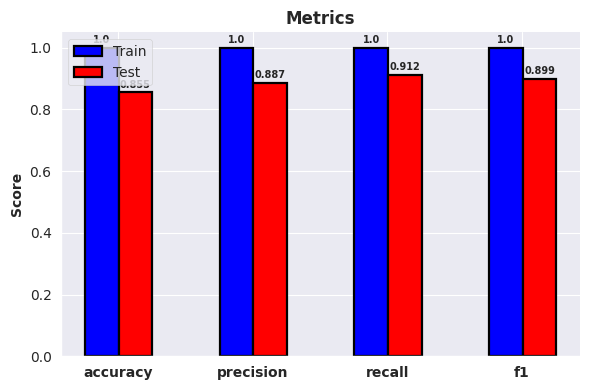

In [55]:
metrics_train_xgb = {'accuracy':round(cv_results_xgb['train_accuracy'].mean(), 3),
                'precision':round(cv_results_xgb['train_precision'].mean(), 3),
                'recall':round(cv_results_xgb['train_recall'].mean(), 3),
                'f1':round(cv_results_xgb['train_f1'].mean(), 3)}

metrics_test_xgb = {'accuracy':round(cv_results_xgb['test_accuracy'].mean(), 3),
                'precision':round(cv_results_xgb['test_precision'].mean(), 3),
                'recall':round(cv_results_xgb['test_recall'].mean(), 3),
                'f1':round(cv_results_xgb['test_f1'].mean(), 3)}

plot_metrics(metrics_train_xgb, metrics_test_xgb, ['accuracy', 'precision', 
                                                   'recall', 'f1'])

In [56]:
cb = CatBoostClassifier(random_state = 123, verbose = 0)

cv_results_cb = cross_validate(estimator = cb,
                               X = X_prep,
                               y = y,
                               scoring = ['accuracy', 'precision', 'recall', 'f1'],
                               cv = skf,
                               verbose = 1,
                               return_train_score = True,
                               error_score = 'raise')

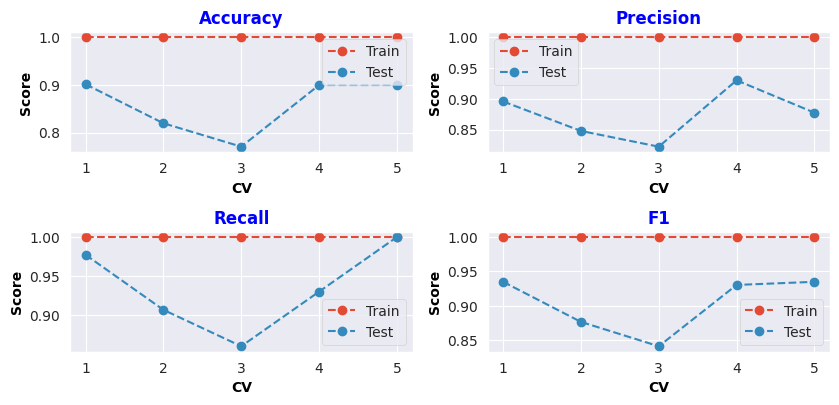

In [57]:
fig,axes = plt.subplots(2,2, figsize = (8.5,4.2))
axes = axes.flat

axes[0].plot(np.arange(1,6,1),cv_results_cb['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
axes[0].plot(np.arange(1,6,1),cv_results_cb['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
axes[0].set_xticks(np.arange(1,6,1))
axes[0].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[0].set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[0].legend()

axes[1].plot(np.arange(1,6,1),cv_results_cb['train_precision'], '-o', linestyle = 'dashed', label = 'Train')
axes[1].plot(np.arange(1,6,1),cv_results_cb['test_precision'], '-o', linestyle = 'dashed', label = 'Test')
axes[1].set_xticks(np.arange(1,6,1))
axes[1].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[1].set_title('Precision', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[1].legend()

axes[2].plot(np.arange(1,6,1),cv_results_cb['train_recall'], '-o', linestyle = 'dashed', label = 'Train')
axes[2].plot(np.arange(1,6,1),cv_results_cb['test_recall'], '-o', linestyle = 'dashed', label = 'Test')
axes[2].set_xticks(np.arange(1,6,1))
axes[2].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[2].set_title('Recall', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[2].legend()

axes[3].plot(np.arange(1,6,1),cv_results_cb['train_f1'], '-o', linestyle = 'dashed', label = 'Train')
axes[3].plot(np.arange(1,6,1),cv_results_cb['test_f1'], '-o', linestyle = 'dashed', label = 'Test')
axes[3].set_xticks(np.arange(1,6,1))
axes[3].set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes[3].set_title('F1', fontsize = 12, fontweight = 'bold', color = 'blue')
axes[3].legend()

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

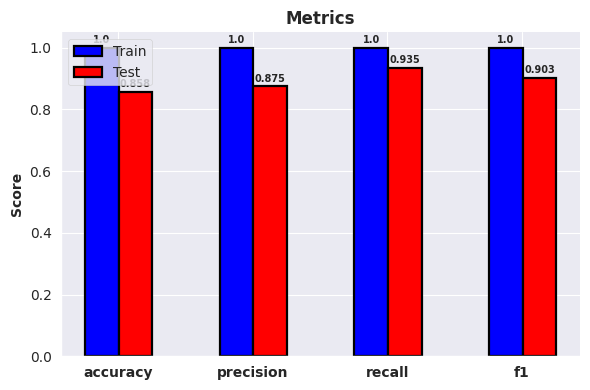

In [58]:
metrics_train_cb = {'accuracy':round(cv_results_cb['train_accuracy'].mean(), 3),
                'precision':round(cv_results_cb['train_precision'].mean(), 3),
                'recall':round(cv_results_cb['train_recall'].mean(), 3),
                'f1':round(cv_results_cb['train_f1'].mean(), 3)}

metrics_test_cb = {'accuracy':round(cv_results_cb['test_accuracy'].mean(), 3),
                'precision':round(cv_results_cb['test_precision'].mean(), 3),
                'recall':round(cv_results_cb['test_recall'].mean(), 3),
                'f1':round(cv_results_cb['test_f1'].mean(), 3)}

plot_metrics(metrics_train_cb, metrics_test_cb, ['accuracy', 'precision', 
                                                 'recall', 'f1'])

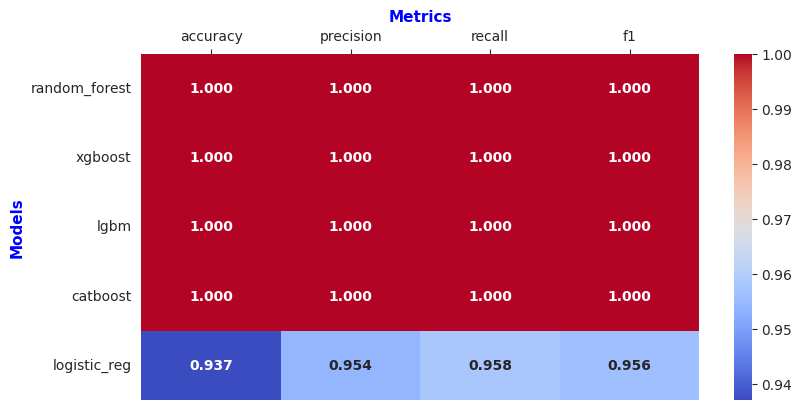

In [59]:
# We create a dictionary that stores the names of the models and their respective metrics.
models_name = {'logistic_reg':metrics_train_lr,
               'random_forest':metrics_train_rf,
               'xgboost':metrics_train_xgb,
               'lgbm':metrics_train_lgbm,
               'catboost':metrics_train_cb}

df_train_metrics = pd.DataFrame.from_dict(models_name,orient='index')
# We order from highest to lowest by the f1 score metric, which is the one we chose because we have unbalanced classes.
df_train_metrics = df_train_metrics.sort_values('recall', ascending = False)

# we visualize the training metrics
fig,ax = plt.subplots(figsize=(9,4.5))
sns.heatmap(df_train_metrics, annot=True, cmap = 'coolwarm', annot_kws = {'fontweight':'bold'},fmt = '.3f', ax = ax)
ax.xaxis.tick_top()
ax.set_ylabel('Models', fontsize = 11, fontweight = 'bold', color = 'blue')
ax.set_title('Metrics', fontsize = 11, fontweight = 'bold', color = 'blue')
fig.show()

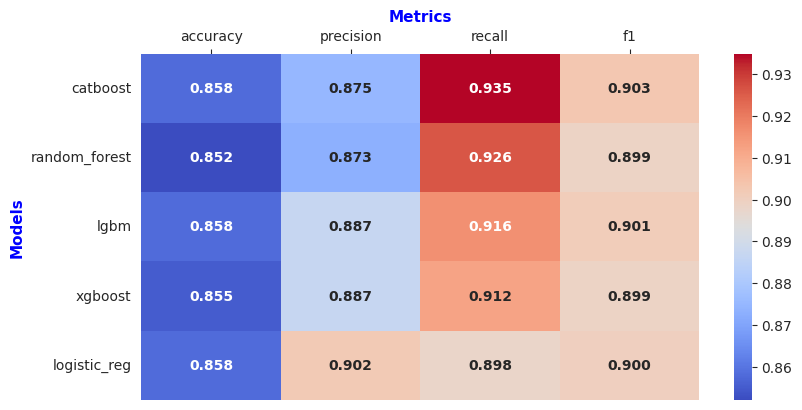

In [60]:
# We create a dictionary that stores the names of the models and their respective metrics.
models_name = {'logistic_reg':metrics_test_lr,
               'random_forest':metrics_test_rf,
               'xgboost':metrics_test_xgb,
               'lgbm':metrics_test_lgbm,
               'catboost':metrics_test_cb}

df_test_metrics = pd.DataFrame.from_dict(models_name,orient='index')
# We order from highest to lowest by the f1 score metric, which is the one we chose because we have unbalanced classes.
df_test_metrics = df_test_metrics.sort_values('recall', ascending = False)

# We visualize the test metrics
fig,ax = plt.subplots(figsize=(9,4.5))
sns.heatmap(df_test_metrics, annot=True, cmap = 'coolwarm', annot_kws = {'fontweight':'bold'},fmt = '.3f', ax = ax)
ax.xaxis.tick_top()
ax.set_ylabel('Models', fontsize = 11, fontweight = 'bold', color = 'blue')
ax.set_title('Metrics', fontsize = 11, fontweight = 'bold', color = 'blue')
fig.show()